In [1]:
!pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
!pip install scipy

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/c6/a1/357e4cd43af2748e1e0407ae0e9a5ea8aaaa6b702833c81be11670dcbad8/scipy-1.11.4-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------------- -------------------------- 20.5/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 435.7 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.4 kB 281.8 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 321.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/43.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/43.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/43.7 MB 656.4 kB/s eta 0:01:07
   ---------------------------------------- 0.1/43.7 MB 939.4 kB/s eta 0:00:47
   ---------------------------------------- 0.2/43.7 MB 833.5 kB/s eta 0:00:53
   ------------------------------


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
#Импортируем библиотеку pandas для работы с данными
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#Читаем csv файл, указываем разделитель. Данные содержат 10000 строк и 13 колонок
df = pd.read_csv ('churn.csv', sep=',',index_col=0)
df


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [6]:
#Посмотрим описание данных.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
#Проверим на наличие дубликаток и пропусков
print('Количество дубликатов:')
print(df.duplicated().sum(), '\n')

print('Количество скрытых дубликатов (без учета столбца с id):')
print(df.drop(columns=['CustomerId']).duplicated().sum(), '\n')

print('Количество пропусков по столбцам:')
print(df.isna().sum())

Количество дубликатов:
0 

Количество скрытых дубликатов (без учета столбца с id):
0 

Количество пропусков по столбцам:
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [8]:
#Посмотрим основные статистики
df.describe()


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# Предварительные результаты после обзора данных следующие:
# Дана таблица, состоящая из 13 столбов и 10000 строк;
# Тип данных: float64(2), int64(8), object(3);
# Размер данных: 1.1 MB;
# Название и описание соддержания столбцов:
# CustomerId — id клиента;
# Surname — Фамилия клиента;
# CreditScore	 — система оценки кредитоспособности (кредитных рисков) лица;
# Geography — страна, где находится банк;
# Gender — пол клиента;
# Age — возраст;
# Tenure — продолжительность сотрудничества в годах;
# Balance — счет в рублях;
# NumOfProducts — количество продуктов (в т.ч. кредитной карты), которыми пользуется клиент;
# HasCrCard — наличие кредитной карты;
# IsActiveMember — активность клиента;
# EstimatedSalary — оценочная зарплата, высчитанная моделью;
# Exited — факт оттока

# Кредитный скоринг у большого числа клиентов банка достаточен для того, чтобы взять кредит;
# В среднем продолжительность сотрудничества с клиентом 5 лет;
# Те, у кого есть дебетовый счет, в среднем имеют на нем в районе 76 485 евро;
# Большая часть клиентов имеет кредитную карту;
# Имеют более одного продукта банка;
# Средняя ЗП в районе 100 000 евро

# Необходимая предобработка заключается в следующем:
# Проверка данных на наличие аномалии;
# Привести столбцы Gender, Geography к бинарному виду

<Axes: title={'center': 'Age'}>

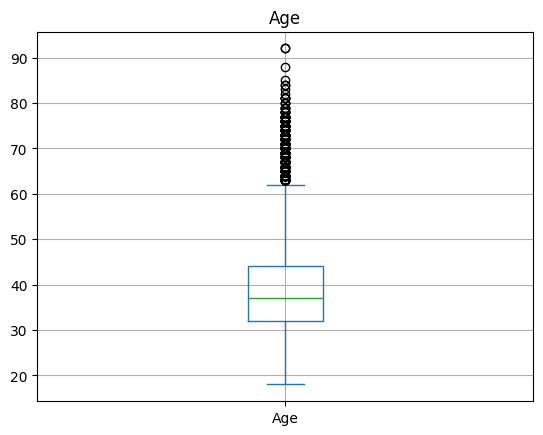

In [9]:
#Строим boxplot по столбцу Age
df['Age'].plot(kind='box',
                   title='Age', grid=True)
# Значительных выбросов не наблюдается

<Axes: title={'center': 'CreditScore'}>

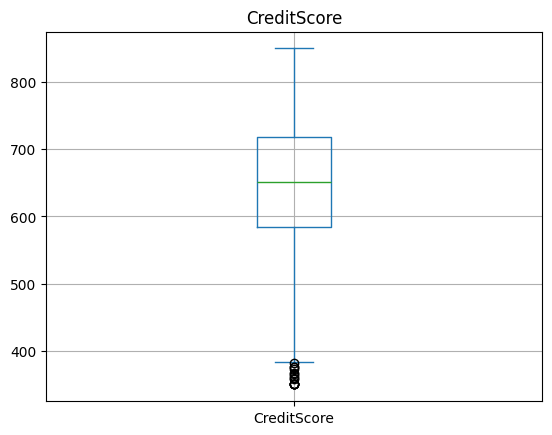

In [10]:
#Строим boxplot  по столбцу CreditScore
df['CreditScore'].plot(kind='box',
                   title='CreditScore', grid=True)
# Выбросы незначительны

In [11]:
# Для столбца "Gender" сначала заменим соответственно значения "Male" и "Female" на "1" и "0":
df['Gender'] = df['Gender'].str.replace("Male", '1')
df['Gender'] = df['Gender'].str.replace("Female", '0')
df['Gender'] = df['Gender'].astype('int')

# Для стобца "Geography" сначала сделаем разбивку по cтранам, затем названия стобцов приведем в необходимый вид:
bank = df.copy() # оставим также на всякий случай исходный датафрейм
bank = pd.get_dummies(bank, columns=["Geography"])
bank =  bank.rename(columns={'Geography_France':'France', 'Geography_Spain':'Spain', 'Geography_Germany':'Germany'})

# Выведем таблицу:
bank.head()
bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Gender           10000 non-null  int32  
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
 12  France           10000 non-null  bool   
 13  Germany          10000 non-null  bool   
 14  Spain            10000 non-null  bool   
dtypes: bool(3), float64(2), int32(1), int64(8), object(1)
memory usage: 1005.9+ KB


In [15]:
bank_corr = bank.drop(['CustomerId', 'Surname'], axis=1)

display(bank_corr.head())

corrs_results = bank_corr.corrwith(bank["Exited"],method='pearson').round(2).nlargest(24)
corrs_results

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
RowNumber,,,,,,,,,,,,,
1,619,0,42,2,0.00,1,1,1,101348.88,1,True,False,False
2,608,0,41,1,83807.86,1,0,1,112542.58,0,False,False,True
3,502,0,42,8,159660.80,3,1,0,113931.57,1,True,False,False
4,699,0,39,1,0.00,2,0,0,93826.63,0,True,False,False
5,850,0,43,2,125510.82,1,1,1,79084.10,0,False,False,True


Exited             1.00
Age                0.29
Germany            0.17
Balance            0.12
EstimatedSalary    0.01
Tenure            -0.01
HasCrCard         -0.01
CreditScore       -0.03
NumOfProducts     -0.05
Spain             -0.05
France            -0.10
Gender            -0.11
IsActiveMember    -0.16
dtype: float64

In [ ]:
# Оценка с полученного списка корреляции по столбцу [Exited]:
#- высокая корреляция наблюдается между параметрами возраст клиента и факт его оттока;
# -Клиентам из Германии более характерен отток из банка;
# -Больший отток прослеживается у клиентов с большим балансом;
#-Прослеживается зависимость от пола;
#- Активные клиенты с меньшей вероятностью уходят;



In [ ]:
# По причине возможных нелинейных связей между признаками дополнительно посмотрим на корреляцию Спирмена:

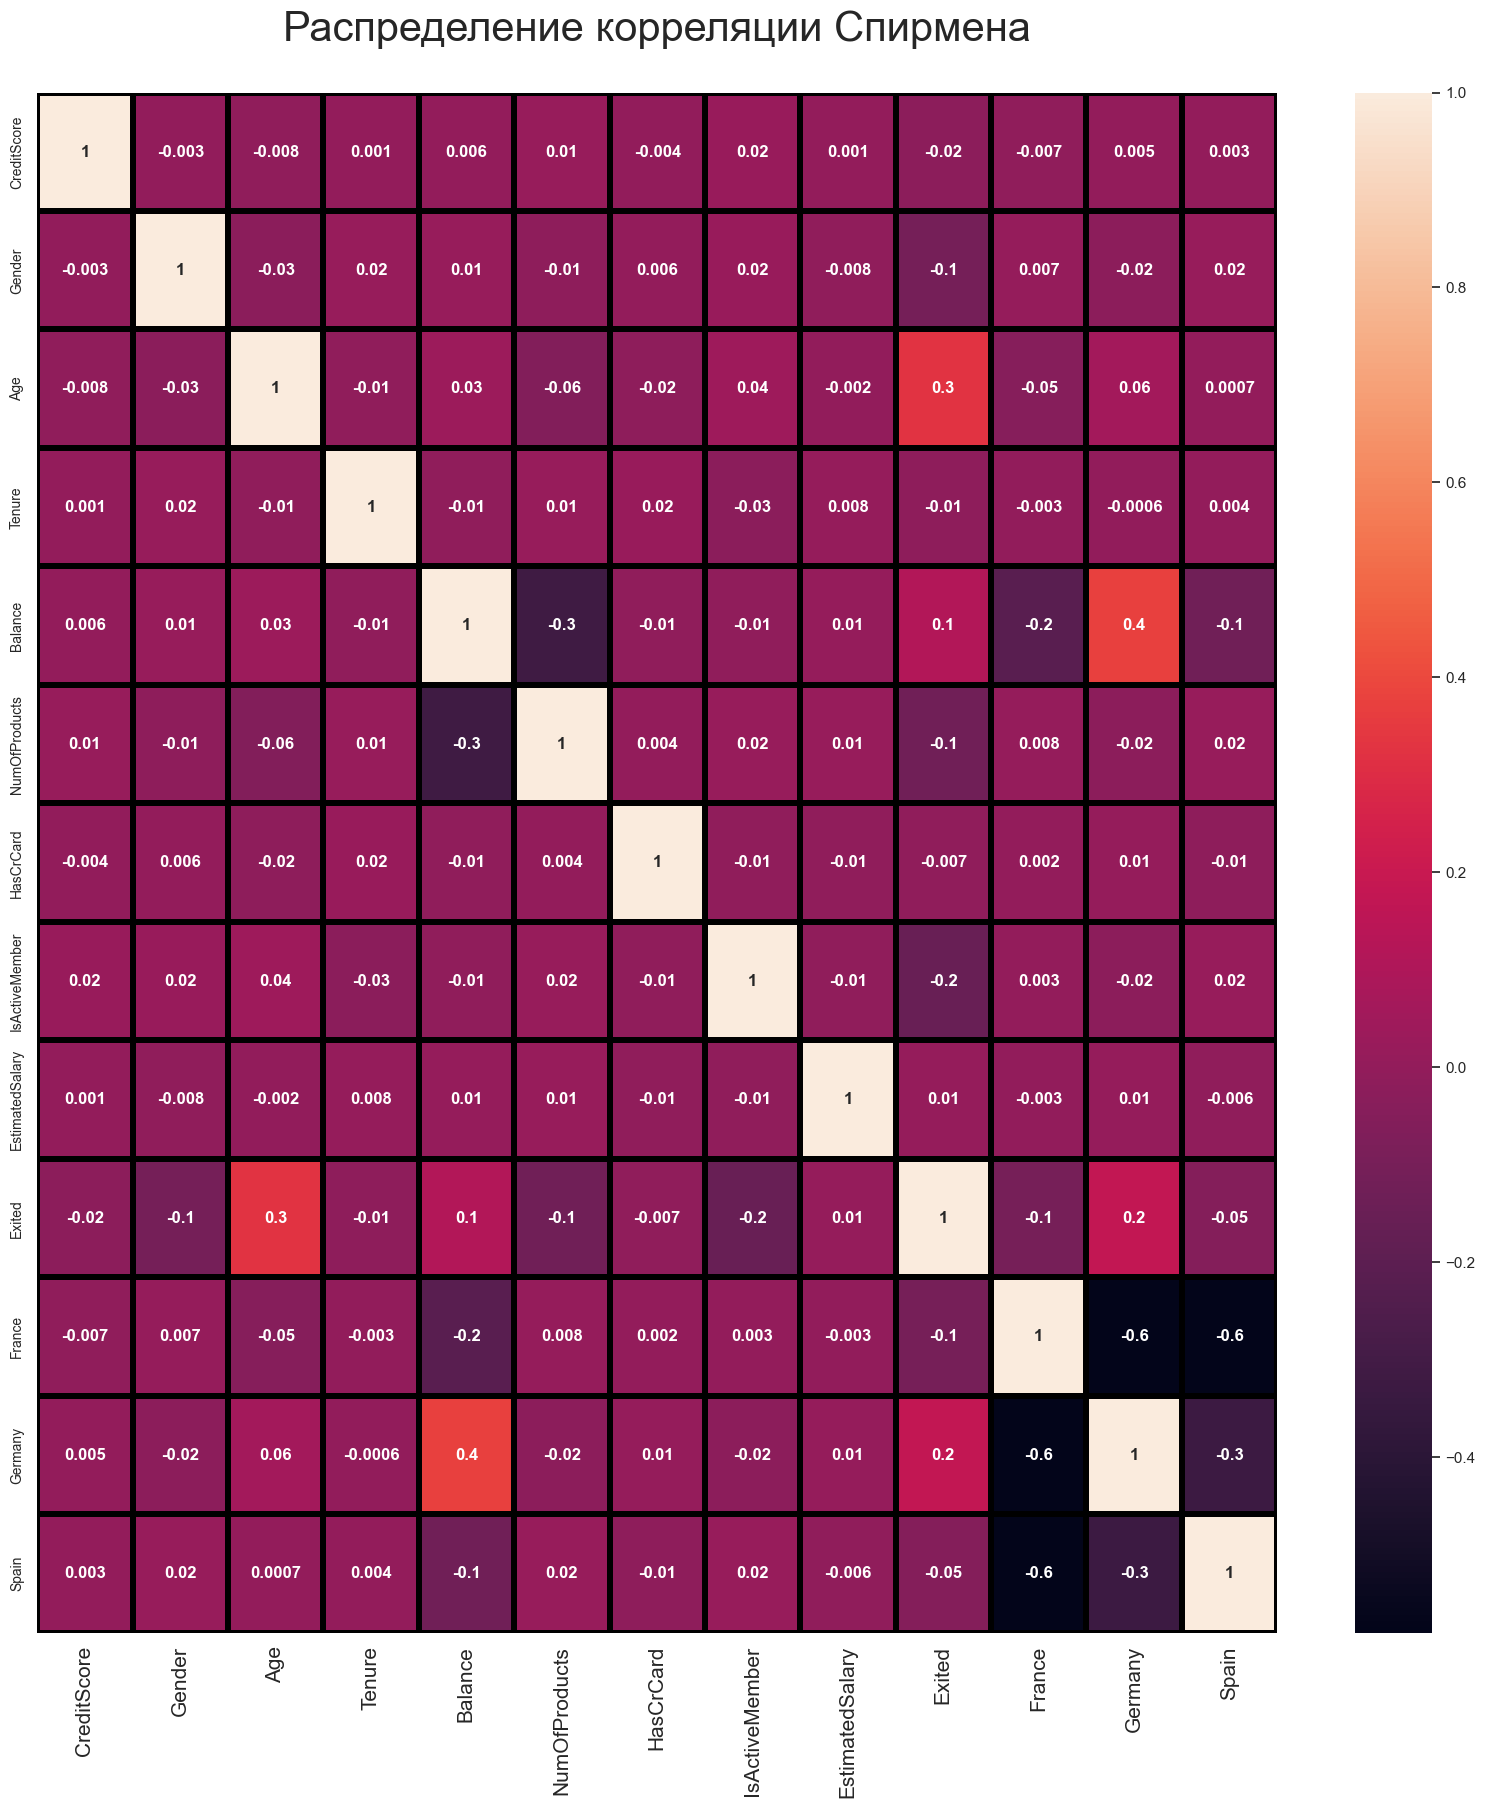

In [26]:
from scipy.stats import spearmanr
spearman = bank_corr.corr('spearman')
sns.heatmap(spearman, annot=True, fmt='.0g', linewidths=3, linecolor='black', annot_kws={'size':12,'weight':'bold'})
plt.title('Распределение корреляции Спирмена\n', fontsize=30)
sns.set(rc = {'figure.figsize':(20,20)})
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 15)
plt.show()

In [ ]:
# Корреляция Спирмена новых взаимосвязей не выявила, а лишь подтвердила старые!